# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Raziqizzan Putrandi
- **Email:** raziqizzan14raziqizzan@apps.ipb.ac.id
- **ID Dicoding:** RAZIQIZZAN PUTRANDI

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa jenis kategori produk yang banyak diminati oleh pembeli?.
- Pertanyaan 2 : Dimana kota yang tepat untuk dilakukan banyak penjualan?.
- Pertanyaan 3 : Tipe pembayaran apa yang banyak digunakan oleh pembeli berdasarkan beberapa kategori?.
- Pertanyaan 4 : Pada tahun tertentu, bagaimana pergerakan pembeli disetiap bulanya?.

## Import Semua Packages/Library yang Digunakan

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [167]:
# Data customer
data_customer = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/customers_dataset.csv")
data_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [168]:
# Data pemesanan
data_pemesanan = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/orders_dataset.csv")
data_pemesanan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [169]:
# data produk
data_produk = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/products_dataset.csv")
data_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [170]:
# Data item pemesanan
data_pemesanan_i = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/order_items_dataset.csv")
data_pemesanan_i.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [171]:
# data pembayaran pemesanan
data_pemesanan_p = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/order_payments_dataset.csv")
data_pemesanan_p.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [172]:
# data kategori produk
data_produk_k = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/product_category_name_translation.csv")
data_produk_k.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [173]:
# data seller
data_seller = pd.read_csv("https://raw.githubusercontent.com/Raziqizzan03/Bangkit/main/sellers_dataset.csv")
data_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [174]:
# Data customer
data_customer.info()
data_customer.isna().sum()
print("jumlah duplikat: ", data_customer.duplicated().sum())
data_customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
jumlah duplikat:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


dapat dilihat bahwa tidak terdapat data yang kosong dan tidak ada data duplikat

In [175]:
# Data pemesanan
data_pemesanan.info()
data_pemesanan.isna().sum()
print("jumlah duplikat: ", data_pemesanan.duplicated().sum())
data_pemesanan.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
jumlah duplikat:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


dapat dilhat pada pemesanan terdapat data yang kosong dan tidak ada duplikat. namun dalam hal ini data yang kosong tidak diperlukan


In [176]:
# data produk
data_produk.info()
data_produk.isna().sum()
print("jumlah duplikat: ", data_produk.duplicated().sum())
data_produk.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
jumlah duplikat:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


dapat dilhat pada data produk terdapat data kosong dan tidak ada duplikat. namun dalam hal ini data yang kosong akan dihapus karena terpakai


In [177]:
# data pemesanan item
data_pemesanan_i.info()
data_pemesanan_i.isna().sum()
print("jumlah duplikat: ", data_pemesanan_i.duplicated().sum())
data_pemesanan_i.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
jumlah duplikat:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


dapat dilihat tidak terdapat data yang kosong dan duplikat

In [178]:
# data pemesanan pembayaran
data_pemesanan_p.info()
data_pemesanan_p.isna().sum()
print("jumlah duplikat: ", data_pemesanan_p.duplicated().sum())
data_pemesanan_p.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
jumlah duplikat:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


dapat dilhat tidak terdapat data kosong dan duplikat


In [179]:
# data kaetori produk
data_produk_k.info()
data_produk_k.isna().sum()
print("jumlah duplikat: ", data_produk_k.duplicated().sum())
data_produk_k.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
jumlah duplikat:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


dapat dilihat tidak terdapat data yang kosong dan duplikat

### Cleaning Data

In [180]:
# data produk
data_produk = data_produk.dropna(axis = 0)
data_produk.info()
data_produk.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

dapat dilihat sudah tidak ada data yang kosong

## Exploratory Data Analysis (EDA)

### Explore kategori produk

In [181]:
# gabungin data yang dibutuhkan
data_kustomer_g = pd.merge(data_customer, data_pemesanan, on='customer_id', how='inner')
data_pemesanan_g = pd.merge(data_kustomer_g, data_pemesanan_i, on = 'order_id',how='inner')
data_pembayaran_g = pd.merge(data_pemesanan_g, data_pemesanan_p, on = 'order_id', how='inner')
data_produk_g = pd.merge(data_pembayaran_g, data_produk, on='product_id', how='inner')
data_g= pd.merge(data_produk_g, data_produk_k, on = 'product_category_name', how= 'inner')
data_g.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,275.79,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,275.79,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,140.61,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,137.58,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [182]:
data_g.groupby(by="product_category_name_english").agg({
    "order_id": "count",
    "price": "mean"
}).sort_values(by='order_id', ascending = False)


,order_id,price
product_category_name_english,,
bed_bath_table,11823,92.408950
health_beauty,9972,130.099860
sports_leisure,8945,114.476952
furniture_decor,8744,87.499301
computers_accessories,8082,116.589652
...,...,...
arts_and_craftmanship,24,75.583750
la_cuisine,16,143.998750
cds_dvds_musicals,14,52.142857


dapat dilihat bahwa kategori produk yang paling banyak dibeli ialah bed_bath_table sedangkan kategori produk yang paling sedikit dibeli ialah security_and_services.

### Explore kota paling banyak pembeli

In [183]:
data_g.groupby(by="customer_city").agg({
    "order_id": "count"
}).sort_values(by='order_id', ascending = False)


,order_id
customer_city,
sao paulo,18277
rio de janeiro,8066
belo horizonte,3191
brasilia,2425
curitiba,1792
...,...
mamonas,1
malhador,1
major porto,1


dapat dilihat bahwa kota terbanyak pembelinya ialah sao paulo

### Explore cara pembayaran

In [184]:
data_g.groupby(by="payment_type").agg({
    "order_id": "count",
    "payment_value": "mean",
    "price" : "sum",
}).sort_values(by='order_id', ascending = False)

,order_id,payment_value,price
payment_type,,,
credit_card,85522,180.053197,10828103.08
boleto,22542,177.481290,2356214.50
voucher,6155,64.735708,645695.68
debit_card,1658,150.253854,180567.02


dapat dilihat bahwa tipe pembayaran terbanyak, total harga produk terbesar,rata rata pembayaran yang dikeluarkan  terdapat di credit_card.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa jenis kategori produk yang banyak diminati oleh pembeli?

In [185]:
jumlah_kategori_produk = data_g.groupby(by="product_category_name_english").agg({
    "order_id": "count"
}).sort_values(by='order_id', ascending = False).reset_index()
jumlah_kategori_produk.columns = ["Nama_produk","Banyak_Pembeli"]
jumlah_kategori_produk.head()

,Nama_produk,Banyak_Pembeli
0,bed_bath_table,11823
1,health_beauty,9972
2,sports_leisure,8945
3,furniture_decor,8744
4,computers_accessories,8082


<ipython-input-186-0bbaf6611959>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Banyak_Pembeli", y="Nama_produk", data=jumlah_kategori_produk.head(5), palette=colors, ax=ax[0])
<ipython-input-186-0bbaf6611959>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Banyak_Pembeli", y="Nama_produk", data=jumlah_kategori_produk.sort_values(by="Banyak_Pembeli", ascending=True).head(5), palette=colors, ax=ax[1])


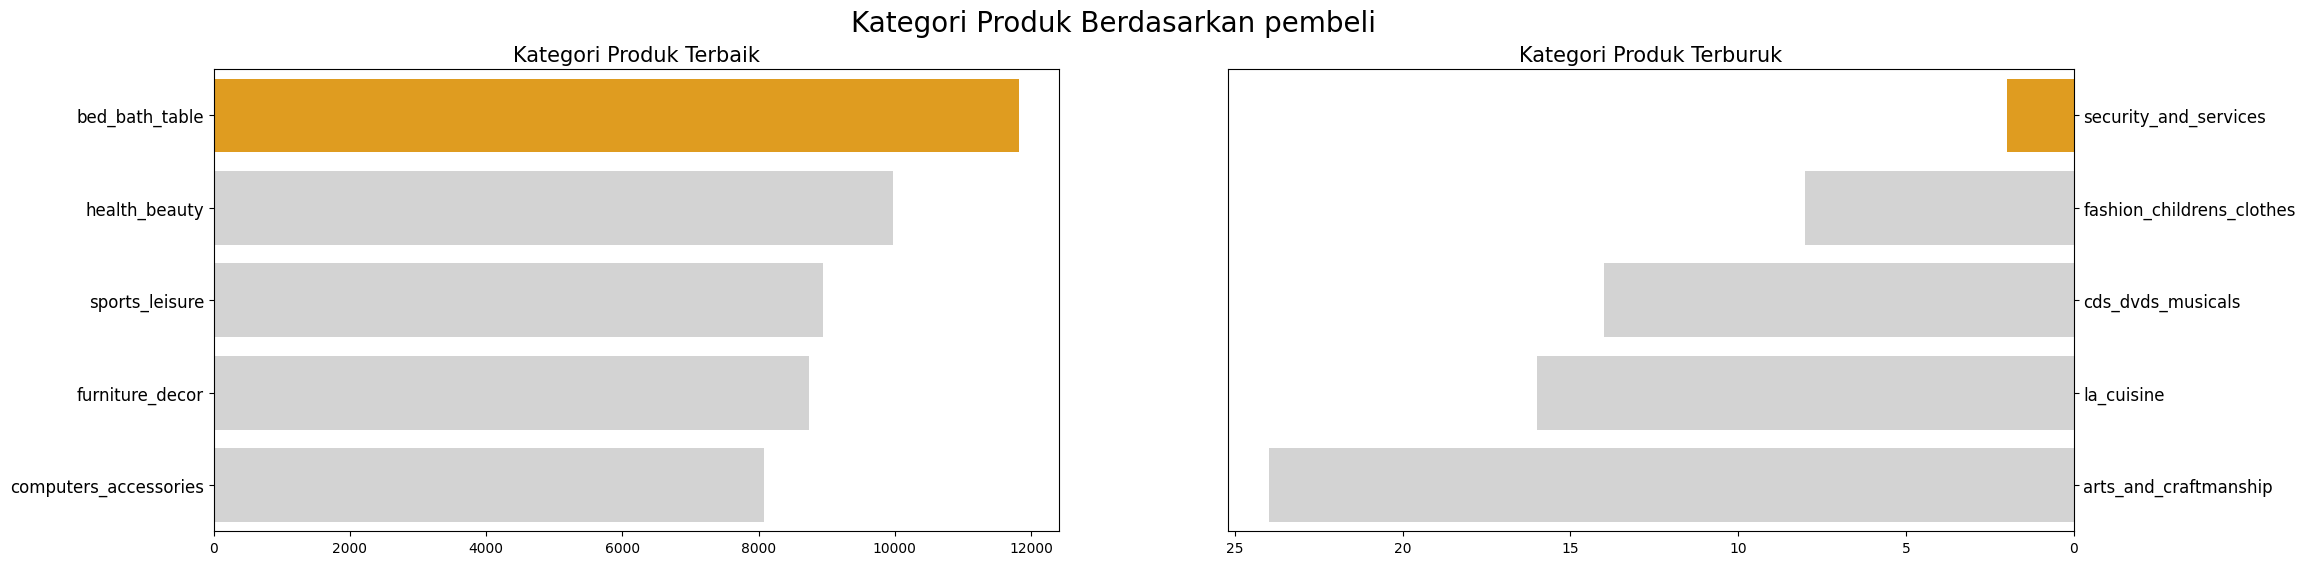

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["orange", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="Banyak_Pembeli", y="Nama_produk", data=jumlah_kategori_produk.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Produk Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="Banyak_Pembeli", y="Nama_produk", data=jumlah_kategori_produk.sort_values(by="Banyak_Pembeli", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Produk Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Kategori Produk Berdasarkan pembeli", fontsize=20)
plt.show()

dapat dilihat bahwa kategori produk yang paling banyak dibeli ialah bed_bath_table sedangkan kategori produk yang paling sedikit dibeli ialah security_and_services.

### Pertanyaan 2: Dimana kota yang tepat untuk dilakukan banyak penjualan?

In [187]:
bykota = data_g.groupby(by="customer_city").order_id.count().reset_index()
bykota.rename(columns={
    "order_id": "Banyak_pembeli"}, inplace=True)

<ipython-input-188-0cc9a056af2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


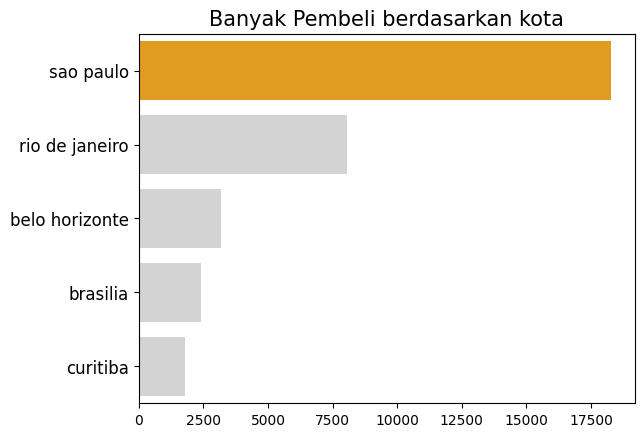

In [188]:
colors_ = ["orange", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="Banyak_pembeli",
    y="customer_city",
    data=bykota.sort_values(by="Banyak_pembeli", ascending=False).head(5),
    palette=colors_
)
plt.title("Banyak Pembeli berdasarkan kota", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dapat dilihat bahwa kota yang paling banyak membeli produk terdapat di sao paulo

### Pertanyaan 3: Tipe Pembayaran apa yang banyak digunakan berdasarkan beberapa kategori

In [189]:
pembayaran_metode = data_g.groupby(by="payment_type").agg({
    "order_id": "count",
    "payment_value": "mean",
    "price" : "sum",
}).reset_index()
pembayaran_metode.columns = ["Tipe_Pembayaran", "Banyak_Pembeli", "Rata_Rata_Pengeluaran", "Total_Harga"]

<ipython-input-190-5e692c03ec4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Banyak_Pembeli", x="Tipe_Pembayaran", data=pembayaran_metode.sort_values(by="Banyak_Pembeli", ascending=False), palette=colors, ax=ax[0])
<ipython-input-190-5e692c03ec4b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Rata_Rata_Pengeluaran", x="Tipe_Pembayaran", data=pembayaran_metode.sort_values(by="Rata_Rata_Pengeluaran", ascending=False), palette=colors, ax=ax[1])
<ipython-input-190-5e692c03ec4b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="

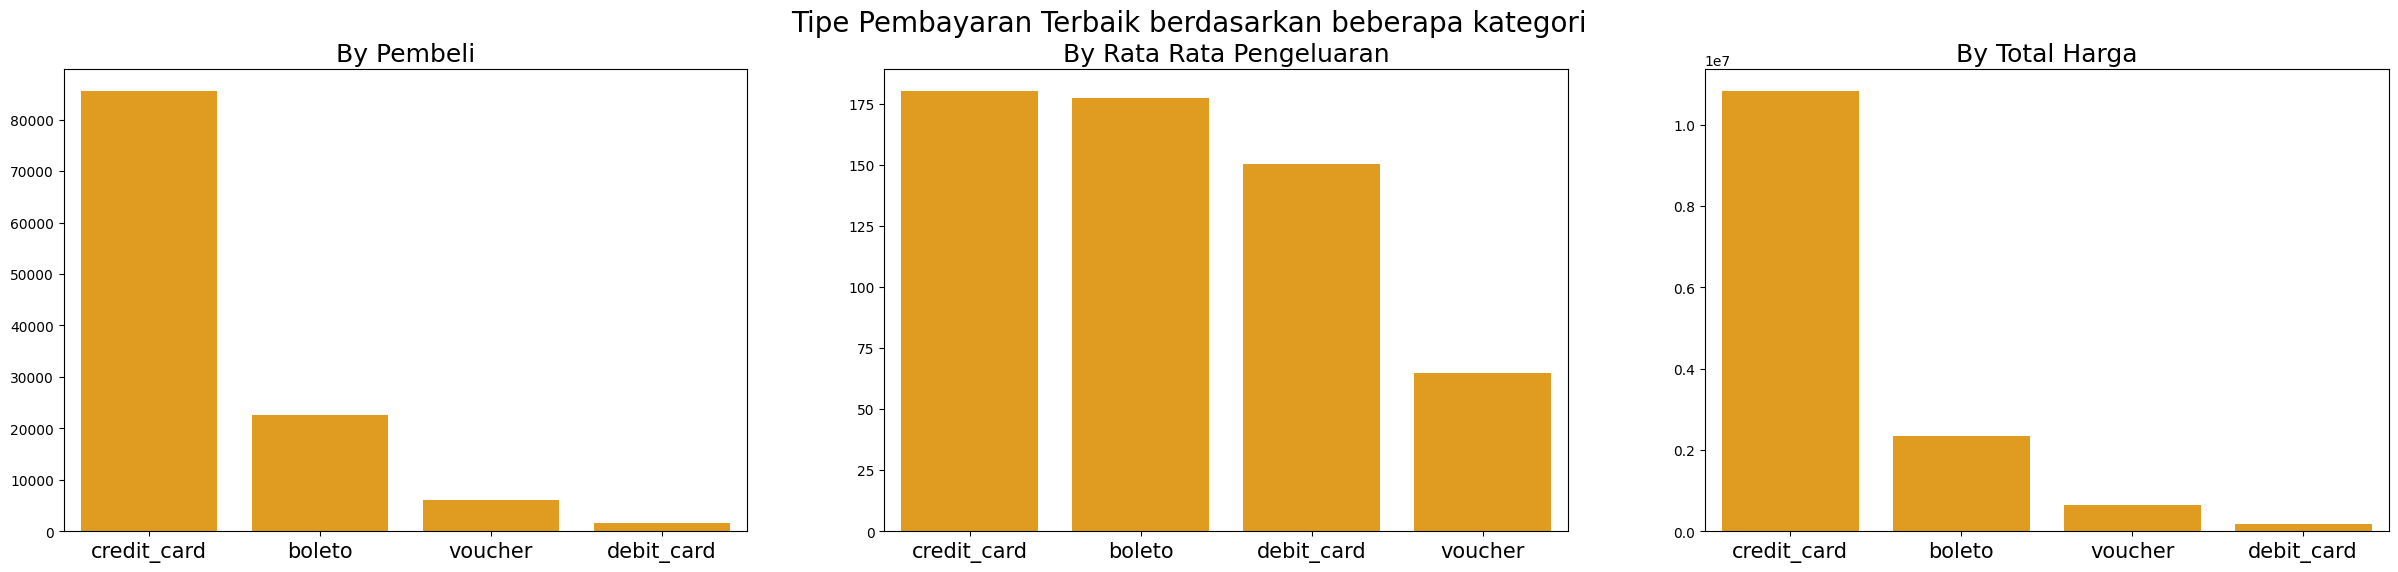

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["orange", "orange", "orange", "orange"]

sns.barplot(y="Banyak_Pembeli", x="Tipe_Pembayaran", data=pembayaran_metode.sort_values(by="Banyak_Pembeli", ascending=False), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Pembeli", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="Rata_Rata_Pengeluaran", x="Tipe_Pembayaran", data=pembayaran_metode.sort_values(by="Rata_Rata_Pengeluaran", ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Rata Rata Pengeluaran", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Total_Harga", x="Tipe_Pembayaran", data=pembayaran_metode.sort_values(by="Total_Harga", ascending=False), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Total Harga", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Tipe Pembayaran Terbaik berdasarkan beberapa kategori", fontsize=20)
plt.show()

dapat dilihat bahwa tipe pembayaran paling banyak berdasarkan 3 kategori tersebut ialah credit_card

### Pertanyaan 4: Pada tahun tertentu, bagaimana pergerakan pembeli disetap bulannya?

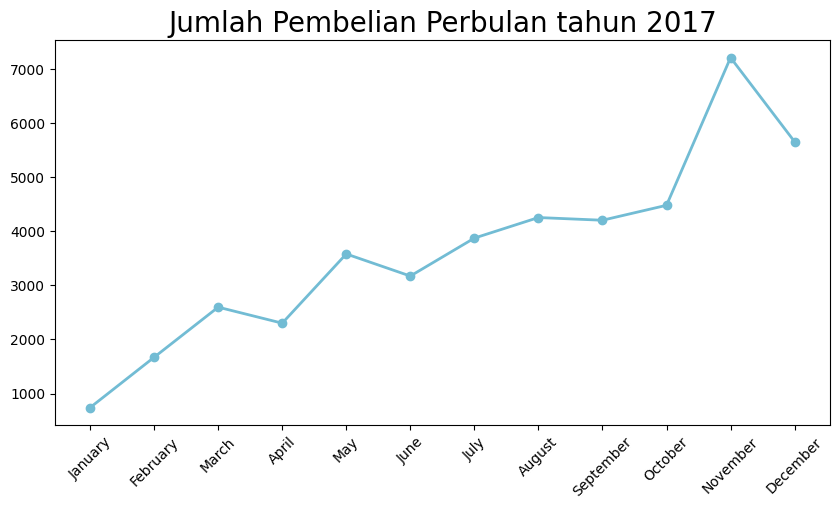

In [191]:
data_g['order_approved_at'] = pd.to_datetime(data_g['order_approved_at'])
data_g.set_index('order_approved_at', inplace=True)
data_2017 = data_g[data_g.index.year == 2017]

Pembelian_bulan = data_2017.resample(rule='M').agg({
    "order_id": "nunique",
})

Pembelian_bulan.index = Pembelian_bulan.index.strftime('%B')
Pembelian_bulan = Pembelian_bulan.reset_index()
Pembelian_bulan.rename(columns={"order_id": "Banyak_Pembeli"}, inplace=True)


plt.figure(figsize=(10, 5))
plt.plot(Pembelian_bulan["order_approved_at"], Pembelian_bulan["Banyak_Pembeli"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Pembelian Perbulan tahun 2017", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

dapat dilihat penjualan dari bulan januari hingga maret, april hingga may, juni hingga agustus, september hingga november terjadi kenaikan pembelian. sedangkan dari bulan maret hingga april, may hingga juni, agustus hingga september terjadi penurunan pembelian

## Conclusion

- Conclution pertanyaan 1 : Sebagai penjual pada kategori produk bed_bath_table perlu di perbanyak jenis itemnya dan juga jumlah barangnya karena kategori tersebut banyak diminati. Sedangkan pada kategori produk security_and_services diperlukan perbaikan seperti dilakukan branding lebih baik ataupun di evaluasi mungkin terdapat beberapa item yang kurang bagus.
- Conclution pertanyaan 2 : Sebagai penjual sebaiknya lebih banyak melakukan promosi serta penjualan di kota sao paulo karena dengan begitu dapat memberikan keuntungan lebih.
- Conclution pertanyaan 3 : Sebagai penjual sepertinya perlu menambahkan semacam bonus jika pembayaran menggunakan kartu kredit karena banyak pembeli yang menggunakan kartu kredit sehingga jika diberikan bonus maka akan menambah keuntungan pembeli
- Conclution pertanyaan 4 : Sebagai penjual sebaiknya melakukan promosi atau diskon pada bulan bulan yang mengalami penurunan pada pembelian. agar pada setiap bulan di satu tahun akan terus mengalami kenaikan pembeli.